In [2]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [3]:
len(df_claim)

1428600

In [4]:
df_claim_uspto = df_claim_uspto = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [5]:
#df_claim=df_claim[["grant_id","patent_title","claims_text","abstract", "main_classification"]]
df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()
df_claim_uspto = df_claim_uspto.reset_index(drop=True)
df_claim_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_28620/1681520836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()


,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [6]:
df_claim_uspto=df_claim_uspto[:60000]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


# preprocessing

In [7]:
def cleantext(df_claim_uspto): 
    
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
    
    #remove numbers
    df_claim_uspto['cleaned_claims_text'] =df_claim_uspto['cleaned_claims_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'https.*$', "", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("   ", " ", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("  ", " ", regex = True)
   
    return df_claim_uspto

df_claim_uspto = cleantext(df_claim_uspto)
df_claim_uspto.head()

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\dtypes\inference.py:181: FutureWarning: Possible nested set at position 1
  re.compile(obj)


,ID,Title,Claim,cpc_subclass,cleaned_claims_text
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...


In [8]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...


In [9]:
# Import the necessary library
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize each word in a given text
def lemmatize_words(text):
    # Split the text into individual words
    words = text.split()
    # Apply lemmatization to each word and join them back into a string
    return " ".join([lemmatizer.lemmatize(word) for word in words])

# Apply the lemmatize_words function to the 'cleaned_claim_text_without_Stopwprd' column of the dataframe
df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# Print the resulting dataframe with the added 'Lemmatized-Cliam' column
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...


In [10]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'Lemmatized-Claim' column
df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)
df_claim_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."


# divide the dataset

In [11]:
#Divide the dataset into different size
df_claim_20K=df_claim_uspto[:20000]
df_claim_20K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
19995,8975813,Light emitting device,1. A display device comprising: a first substr...,"H01L,Y10S",a display device comprising a first substrate...,display first substrate first pixel first subs...,display first substrate first pixel first subs...,"[display, first, substrate, first, pixel, firs..."
19996,8975173,Semiconductor device with buried gate and meth...,1. A method for fabricating a semiconductor de...,H01L,a method for fabricating a semiconductor devi...,fabricating semiconductor forming first layer ...,fabricating semiconductor forming first layer ...,"[fabricating, semiconductor, forming, first, l..."
19997,8976859,Processing a video for spatial and temporal ma...,1. A method for increasing a resolution of a v...,"G06T,H04N",a method for increasing a resolution of a vid...,increasing resolution video receiving image fr...,increasing resolution video receiving image fr...,"[increasing, resolution, video, receiving, ima..."
19998,8977244,Extensible phone application,"1. A mobile communication device, comprising: ...",H04M,a mobile communication device comprising a me...,mobile communication memory encoded computerex...,mobile communication memory encoded computerex...,"[mobile, communication, memory, encoded, compu..."


# Bertopic for 20k patent

In [12]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=45, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-14 18:03:43,108 - BERTopic - Transformed documents to Embeddings
2023-03-14 18:05:34,124 - BERTopic - Reduced dimensionality
2023-03-14 18:05:40,574 - BERTopic - Clustered reduced embeddings


In [13]:
#evaluation

In [14]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  0.000453451569911182


In [15]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5231920901923311


In [16]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()
print("u_mass is: ", coherence_u_mass)

u_mass is:  -1.0026737471644604


In [17]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,12173,-1_network_user_message_server
1,0,352,0_voltage_switching_converter_switch
2,1,235,1_memory_instruction_processor memory_executable
3,2,206,2_antenna_ground_conductor_feeding
4,3,121,3_cooling_air_heat_fluid
...,...,...,...
194,193,15,193_barrier layer_drain_electron_lateral surface
195,194,15,194_cable_conductor_sleeve_shield
196,195,15,195_chassis_port_switch_card
197,196,15,196_motor_electric_electricity_generator


In [18]:
df_claim_20K['Bertopic_topics'] = topics
df_claim_20K['Bertopic_prob'] = probabilities
#search_topics=df_claim_20K[df_claim_20K['predicted_topic'] == 71]
#search_topics = search_topics.sort_values('predicted_topic_prob', ascending=False)
#search_topics = df_claim_20K.reset_index().rename(columns={'index': 'new_index'})
df_Claim_20K_topic=df_claim_20K[["ID","Title","Claim", "Lemmatized-Claim","Bertopic_topics","Bertopic_prob"]]
df_Claim_20K_topic

,ID,Title,Claim,Lemmatized-Claim,Bertopic_topics,Bertopic_prob
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...",advertising displaying television program vide...,-1,0.000000
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...",receiving mobile switching network carrier gat...,18,0.748160
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,resistance change memory first interconnect li...,16,0.806005
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,processing first processing second processing ...,-1,0.000000
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,computerimplemented transferring electronic de...,69,0.947255
...,...,...,...,...,...,...
19995,8975813,Light emitting device,1. A display device comprising: a first substr...,display first substrate first pixel first subs...,21,0.588061
19996,8975173,Semiconductor device with buried gate and meth...,1. A method for fabricating a semiconductor de...,fabricating semiconductor forming first layer ...,-1,0.000000
19997,8976859,Processing a video for spatial and temporal ma...,1. A method for increasing a resolution of a v...,increasing resolution video receiving image fr...,-1,0.000000
19998,8977244,Extensible phone application,"1. A mobile communication device, comprising: ...",mobile communication memory encoded computerex...,1,0.335362


In [19]:
#prediction

In [20]:
New_Sample = df_claim_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
59394,9083591,Communication apparatus and communication method,1. A communication apparatus for communicating...,H04L,a communication apparatus for communicating w...,communication communicating another orthogonal...,communication communicating another orthogonal...,"[communication, communicating, another, orthog..."


In [21]:
new_claim = str(New_Sample["Lemmatized-Claim"].iloc[0])
new_claim

'communication communicating another orthogonal frequencydivision multiplexing wireless communication communication modulator modulates input signal using predetermined modulation scheme assigns modulated input signal subcarriers frequency component orthogonal thereby generating subcarrier modulation signal inserter insert transmissionside series signal synthesis way element signal synthesis element transmissionside series alternately positioned thereby generating first signal synthesis generated multiplying subcarrier modulation signal predetermined signal amplitude coefficient transmissionside series generated multiplying series set whose quantity equal number subcarriers autocorrelation property autocorrelation value series whose shifted higher autocorrelation value series whose shifted predetermined series amplitude coefficient first transformer performs inverse fast fourier transformation first separator separate operation result first transformer first half second half element eq

In [22]:
# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_claim, top_n=num_of_topics); 

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

for idx, topic_idx in enumerate(similar_topics):
    topic = topic_model.get_topic(topic_idx)
    keywords = ' '.join(str(keyword) for keyword in topic[0])
    print(f"Topic {idx+1}: {keywords}")

The top 3 similar topics are [180, 54, 176], and the similarities are [0.63 0.61 0.61]
Topic 1: rf 0.10978771128242326
Topic 2: impedance 0.06667887413426597
Topic 3: oscillator 0.06455527953976922


In [23]:
filter_topics_Bertopic=df_Claim_20K_topic[df_Claim_20K_topic['Bertopic_topics'] == 180]
filter_topics_Bertopic = filter_topics_Bertopic.sort_values('Bertopic_prob', ascending=False)
filter_topics_Bertopic = filter_topics_Bertopic.reset_index().rename(columns={'index': 'new_index'})
filter_topics_Bertopic

,new_index,ID,Title,Claim,Lemmatized-Claim,Bertopic_topics,Bertopic_prob
0,837,8929480,Transmitter,"1. A transmitter, comprising: a plurality of d...",transmitter direct rf converter connected para...,180,1.0
1,2371,8934573,Distortion-compensated RF transmitter and meth...,1. A distortion-compensated radio-frequency (R...,distortioncompensated radiofrequency rf transm...,180,1.0
2,4928,8938207,Radio frequency receiver and radio receiver,"1. A radio frequency (RF) receiver, comprising...",radio frequency rf receiver local oscillator g...,180,1.0
3,5359,8942656,Reduction of second order distortion in real time,"1. In a radio receiver, a method of reducing s...",radio receiver reducing second order distortio...,180,1.0
4,5379,8942635,Method and system for compensating for estimat...,"1. A system implemented in a single chip, comp...",implemented single chip feedback mixer circuit...,180,1.0
5,7434,8948700,Method and system for compensating for distort...,"1. A system, comprising: a radio frequency (RF...",radio frequency rf receiver rf transmitter gen...,180,1.0
6,8120,8948325,Method and apparatus for digital post-distorti...,1. A method to compensate for non-linearity di...,compensate nonlinearity distortion radio frequ...,180,1.0
7,8453,8948306,Broadband high efficiency amplifier system,1. A system for generating a modulated radio f...,generating modulated radio frequency rf output...,180,1.0
8,10029,8953670,Digital power encoder for direct digital-RF tr...,"1. A transmitter, comprising: a first digital ...",transmitter first digital upconverter converti...,180,1.0
9,12702,8958769,Direct conversion receiver for angle modulated...,1. A direct conversion receiver to demodulate ...,direct conversion receiver demodulate received...,180,1.0


In [24]:
#caculate the similarity between docs and new claim

In [25]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Load the pre-trained model
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode the documents in the dataset
document_embeddings = sbert_model.encode(filter_topics_Bertopic['Lemmatized-Claim'])

# Encode the new sample
document_embeddings = np.vstack(document_embeddings)
new_sample_embedding = sbert_model.encode([new_claim])

# Compute cosine similarity scores
cos_similarities = cosine_similarity(document_embeddings, new_sample_embedding)
filter_topics_Bertopic['cosine_similarity_BERTopic'] = cos_similarities.flatten()


# Compute euclidean distances
#euc_distances = euclidean_distances(document_embeddings, new_sample_embedding)
#search_topics['euclidean_distance'] = euc_distances.flatten()

# Sort by cosine similarity and display the top results
#search_topics.sort_values('cosine_similarity_BERTopic', ascending=False, inplace=True)

In [26]:
filter_topics_Bertopic

,new_index,ID,Title,Claim,Lemmatized-Claim,Bertopic_topics,Bertopic_prob,cosine_similarity_BERTopic
0,837,8929480,Transmitter,"1. A transmitter, comprising: a plurality of d...",transmitter direct rf converter connected para...,180,1.0,0.775523
1,2371,8934573,Distortion-compensated RF transmitter and meth...,1. A distortion-compensated radio-frequency (R...,distortioncompensated radiofrequency rf transm...,180,1.0,0.767292
2,4928,8938207,Radio frequency receiver and radio receiver,"1. A radio frequency (RF) receiver, comprising...",radio frequency rf receiver local oscillator g...,180,1.0,0.804101
3,5359,8942656,Reduction of second order distortion in real time,"1. In a radio receiver, a method of reducing s...",radio receiver reducing second order distortio...,180,1.0,0.822805
4,5379,8942635,Method and system for compensating for estimat...,"1. A system implemented in a single chip, comp...",implemented single chip feedback mixer circuit...,180,1.0,0.730273
5,7434,8948700,Method and system for compensating for distort...,"1. A system, comprising: a radio frequency (RF...",radio frequency rf receiver rf transmitter gen...,180,1.0,0.773730
6,8120,8948325,Method and apparatus for digital post-distorti...,1. A method to compensate for non-linearity di...,compensate nonlinearity distortion radio frequ...,180,1.0,0.767601
7,8453,8948306,Broadband high efficiency amplifier system,1. A system for generating a modulated radio f...,generating modulated radio frequency rf output...,180,1.0,0.841520
8,10029,8953670,Digital power encoder for direct digital-RF tr...,"1. A transmitter, comprising: a first digital ...",transmitter first digital upconverter converti...,180,1.0,0.838892
9,12702,8958769,Direct conversion receiver for angle modulated...,1. A direct conversion receiver to demodulate ...,direct conversion receiver demodulate received...,180,1.0,0.852787


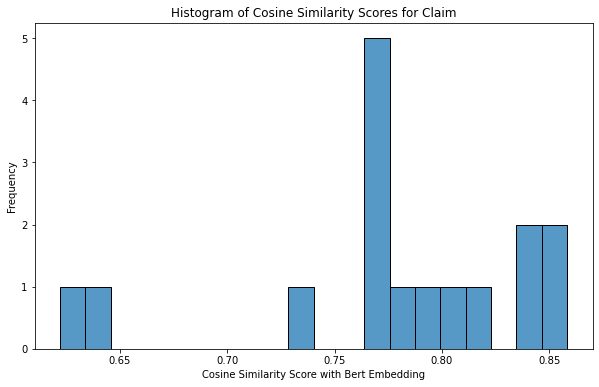

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_Bertopic['cosine_similarity_BERTopic']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores for Claim')
plt.xlabel('Cosine Similarity Score with Bert Embedding')
plt.ylabel('Frequency')
plt.show()

In [28]:
#get the most similar doc in dataset to query

In [29]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['Claim']

most_similar_doc

'1. A frequency translation device, comprising: a transmit circuit including a first frequency converter configured to wirelessly receive a signal at a first RF frequency from a wireless communication device that is separate from the frequency translation device and to convert the signal at the first RF frequency into a signal at one of a plurality of second RF frequencies; a receive circuit including a second frequency converter configured to convert a signal at the one of the plurality of second RF frequencies into a signal at the first RF frequency and to wirelessly send the converted signal at the first RF frequency to the wireless communication device that is separate from the frequency translation device; a detector circuit configured to determine when the frequency translation device is receiving a signal, and to route the signal to the transmit circuit or to the receive circuit; and a frequency reference circuit including a phase locked synthesizer configured to provide a selec

In [30]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['Lemmatized-Claim']

most_similar_doc

'frequency translation transmit circuit first frequency converter wirelessly receive signal first rf frequency wireless communication separate frequency translation convert signal first rf frequency signal one second rf frequency receive circuit second frequency converter convert signal one second rf frequency signal first rf frequency wirelessly send converted signal first rf frequency wireless communication separate frequency translation detector circuit determine frequency translation receiving signal route signal transmit circuit receive circuit frequency reference circuit phase locked synthesizer provide selectable reference signal transmit circuit receive circuit selectable reference signal determines one second rf frequency used transmit circuit receive circuit'

In [31]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_Bertopic = filter_topics_Bertopic.sort_values(by=['cosine_similarity_BERTopic'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_Bertopic.iloc[0]['ID']

most_similar_doc

8977215